Explanatory example with mock data. You can use this file to apply the pipeline on your dataset. Parts that you need to adjust are marked with: ⚠️
Requirements:
Dataset
- If you want to use the dataset specific ranking you need the RAW data! (Excpet you are certain that your preprocessing does not have an impact on data leakage)
- You can use your own preprocessing for the clustering, the raw data, or our preprocessing that is shown below the clustering.
- the dataset has to contian the "Intensity", "Patient_ID", and "Sample_ID" columns, with unique sample ids.

## Imports

In [1]:
import pandas as pd
import numpy as np
import copy
from spqrp import core, filtering, helpers, preprocessing, protein_selection
import plotly.io as pio

## Read Dataframe & prepare data

In [ ]:
# ⚠️⚠️
df = pd.read_csv(".\spqrp\data\example_data\example_input_cohort_df.csv")
df_raw = df  # substitute with real raw data

# ensure sample ids are unique

<>:2: SyntaxWarning:

invalid escape sequence '\s'

<>:2: SyntaxWarning:

invalid escape sequence '\s'

C:\Users\FRH\AppData\Local\Temp\ipykernel_31852\229768743.py:2: SyntaxWarning:

invalid escape sequence '\s'



### Rename Columns to Match Requirements

In [ ]:
# ⚠️
# e.g. -> the example dataset already has the right columns
# df["Sample_ID"] = df["Sample"]
# df["Patient_ID"] = df["Patient"]
# df_raw["Sample_ID"] = df_raw["Sample"]
# df_raw["Patient_ID"] = df_raw["Patient"]

## Import Ranking

### for example from cohort a

In [ ]:
# ⚠️ if you want to use your own precomputed ranking ⚠️

ranking = pd.read_csv(".\\spqrp\data\\example_data\\example_protein_ranking.csv")

# ⚠️ if you want to use our precomputed ranking you have to uncommend:
# ranking_cohort_a = pd.read_csv(".\spqrp\spqrp\data\\ranked_classification_importance_cohort_a.csv")
# ranking = ranking_cohort_a

<>:3: SyntaxWarning:

invalid escape sequence '\d'

<>:3: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\FRH\AppData\Local\Temp\ipykernel_31852\1968858365.py:3: SyntaxWarning:

invalid escape sequence '\d'



## OR Calculate Ranking

In [ ]:
# ⚠️ if you wan't to compute your specific ranking on the RAW data:
#
# results = protein_selection.train_with_normalise(df_raw)
# if you want to compute your own ranking on the data uncomment:

# ranking = retrive_ranking(results)

## Filter 

In [ ]:
df_filtered = filtering.remove_proteins_from_filtering(df)

## Run Clustering (e.g. Manhattan distance, 20 proteins)

Checking if columns: ['Sample_ID', 'Patient_ID', 'Intensity', 'Protein'] are present in protein matrix
All required columns are present for protein matrix.
Checking if columns: ['Protein', 'Importance'] are present in importance ranking
All required columns are present for importance ranking.


c:\Users\FRH\Documents\HPI-Master\MasterArbeit\complete_spqrp_pipeline\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

c:\Users\FRH\Documents\HPI-Master\MasterArbeit\complete_spqrp_pipeline\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\FRH\Documents\HPI-Master\MasterArbeit\complete_spqrp_pipeline\.venv\Lib\site-packages\umap\umap_.py:1858: UserWarning:

using precomputed metric; inverse_transform will be unavailable

c:\Users\FRH\Documents\HPI-Master\MasterArbeit\complete_spqrp_pipeline\.venv\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



=== Pairwise Clustering Performance (Transitive) ===
TP: 8, FP: 4, FN: 2, TN: 337
Precision: 0.667
Sensitivity:    0.800
F1 Score:  0.727
Accuracy:  0.983
Balanced Accuracy:  0.894
=== Overall Clustering Agreement ===
Adjusted Rand Index (ARI): 0.719
Normalized Mutual Info (NMI): 0.944

False Negative (FN) pairs (same patient but not transitively connected): 2
  - 12_S1 <-> 12_S2
  - 5_S1 <-> 5_S2


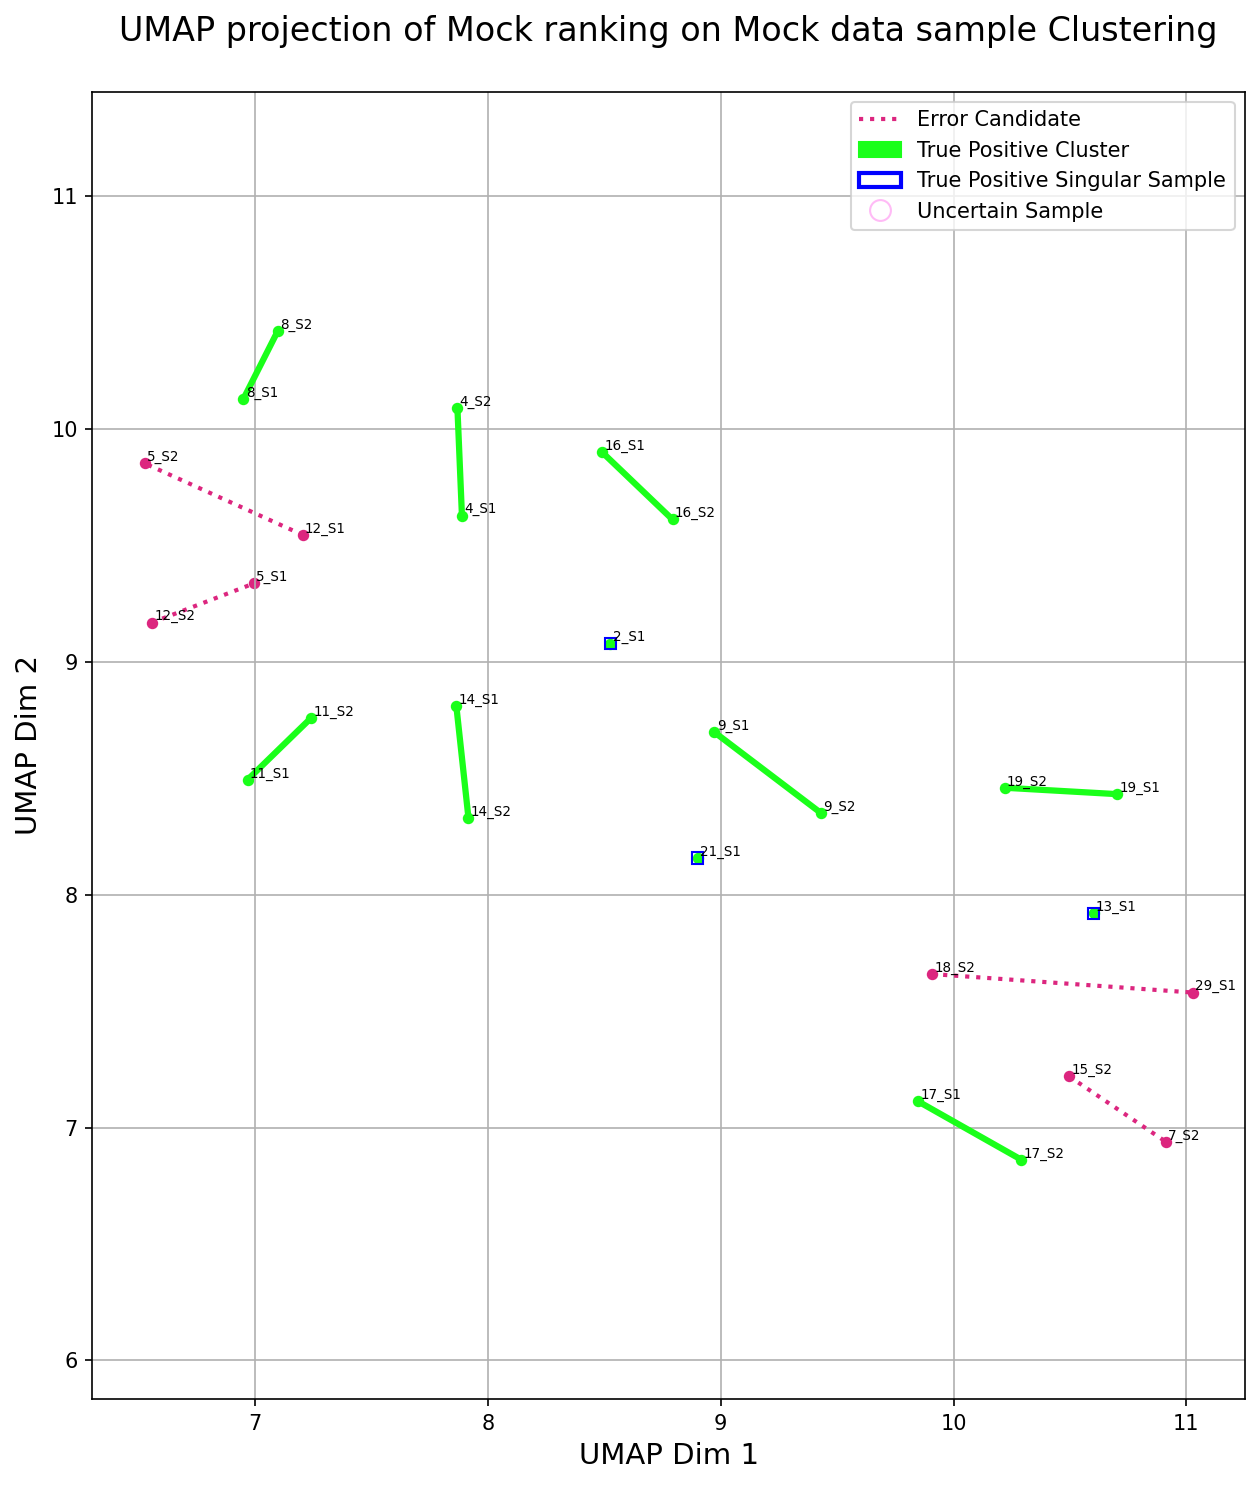

{'result_filtered': {'sample_order': ['11_S1',
   '11_S2',
   '12_S1',
   '12_S2',
   '13_S1',
   '14_S1',
   '14_S2',
   '15_S2',
   '16_S1',
   '16_S2',
   '17_S1',
   '17_S2',
   '18_S2',
   '19_S1',
   '19_S2',
   '21_S1',
   '29_S1',
   '2_S1',
   '4_S1',
   '4_S2',
   '5_S1',
   '5_S2',
   '7_S2',
   '8_S1',
   '8_S2',
   '9_S1',
   '9_S2'],
  'distance_matrix': array([[0.  , 0.22, 0.54, 0.57, 1.84, 0.76, 0.67, 1.29, 1.71, 1.5 , 0.93,
          1.  , 1.2 , 1.93, 1.86, 1.04, 1.67, 1.47, 1.19, 1.22, 0.56, 0.52,
          1.31, 0.79, 0.86, 1.34, 1.41],
         [0.22, 0.  , 0.44, 0.51, 1.92, 0.64, 0.67, 1.27, 1.61, 1.4 , 1.01,
          1.1 , 1.28, 2.01, 1.94, 0.94, 1.75, 1.35, 1.15, 1.22, 0.48, 0.6 ,
          1.29, 0.81, 1.  , 1.24, 1.31],
         [0.54, 0.44, 0.  , 0.35, 1.48, 0.78, 0.79, 1.57, 1.17, 0.96, 1.13,
          1.3 , 1.44, 1.57, 1.5 , 0.96, 1.63, 0.95, 0.75, 0.82, 0.4 , 0.26,
          1.59, 0.45, 0.64, 0.94, 0.97],
         [0.57, 0.51, 0.35, 0.  , 1.83, 0.81, 0.84, 

In [ ]:
# create clustering
# ⚠️⚠️⚠️for default application:
#   set n_neighbors = expected number of samples per patient -1
#   set max_component_size = expected number of samples per patient
#   keep default metric as "manhattan" (only needed to change if you want to test another metric)

# ⚠️
n_neighbors = 1
# ⚠️
max_component_size = n_neighbors + 1
core.run_clustering(
    df=df_filtered, ranking=ranking, n_neighbors=1, max_component_size=2, plot_name = "Mock ranking on Mock data"
)

# Extra: Preprocessing of dataset

In [ ]:
# ⚠️ Input your raw data and select which preprocessing steps should be performed
# again: ensure correct naming etc.
df_raw = pd.read_csv(".\spqrp\data\example_data\example_input_cohort_df.csv")

# df_raw["Sample_ID"] = df_raw["Sample"]
# df_raw["Patient_ID"] = df_raw["Patient"]
df_new = copy.deepcopy(df_raw)
df_new

<>:3: SyntaxWarning:

invalid escape sequence '\s'

<>:3: SyntaxWarning:

invalid escape sequence '\s'

C:\Users\FRH\AppData\Local\Temp\ipykernel_13160\675395619.py:3: SyntaxWarning:

invalid escape sequence '\s'



,Sample_ID,Patient_ID,Protein,Intensity
0,1_S1,P001,ProtA,0.39
1,1_S1,P001,ProtB,1.00
2,1_S1,P001,ProtC,0.70
3,1_S1,P001,ProtD,0.57
4,1_S1,P001,ProtE,0.13
...,...,...,...,...
295,30_S2,P030,ProtA,0.30
296,30_S2,P030,ProtB,0.12
297,30_S2,P030,ProtC,0.06
298,30_S2,P030,ProtD,0.83


c:\Users\FRH\Documents\HPI-Master\MasterArbeit\complete_spqrp_pipeline\spqrp\spqrp\preprocessing.py:77: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



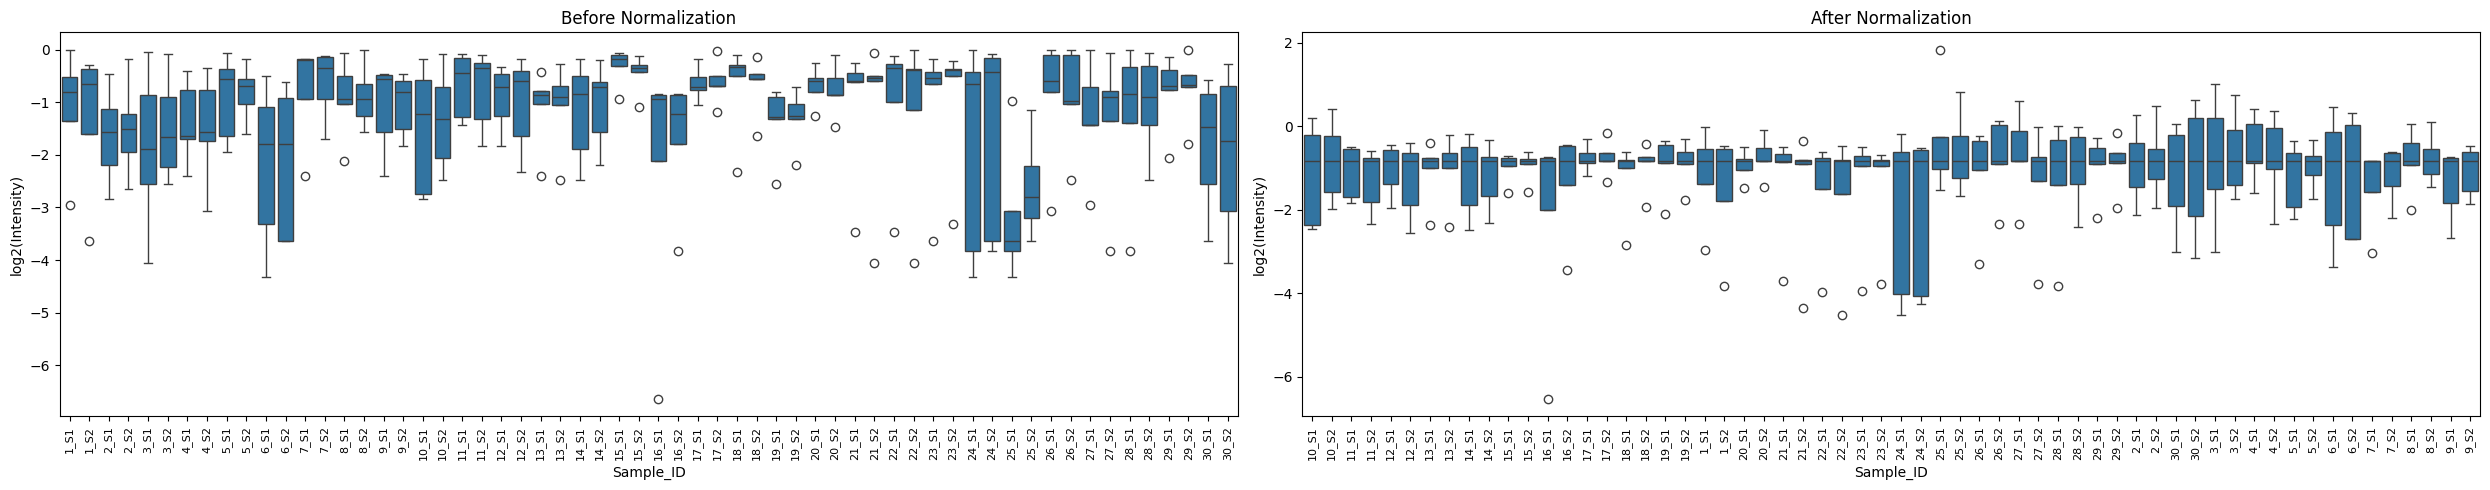

⚠️ No 'plate' or 'Plate' column found. Skipping plate effect correction.


,Sample_ID,Patient_ID,Protein,Intensity,NormalizeFactor
0,10_S1,P010,ProtA,-2.455411,-0.381090
1,10_S1,P010,ProtB,-0.196677,-0.381090
2,10_S1,P010,ProtC,-0.836501,-0.381090
3,10_S1,P010,ProtD,0.196666,-0.381090
4,10_S1,P010,ProtE,-2.355875,-0.381090
...,...,...,...,...,...
293,9_S2,P009,ProtA,-1.862036,0.025535
294,9_S2,P009,ProtB,-0.479567,0.025535
295,9_S2,P009,ProtC,-1.540108,0.025535
296,9_S2,P009,ProtD,-0.624997,0.025535


In [ ]:
# Preprocessing steps if not already done

# 1. All zero intensity values are turned into NaN values to represent them explicitly as missing values.
df_new = df_new.replace(0, np.nan)
# 2. The intensities are log_2 transformed.
df_new = preprocessing.log_transform(df_new)

# filter by threshold
threshold = 0.7
df_new = preprocessing.filter_by_occurrence(df_new, threshold)
# 4. We perform median normalization per sample, and
df_new = preprocessing.normalize_medianintensity(df_new)
# 5. we regress out the plate effect.
df_new = preprocessing.plate_correct_residuals_by_protein(df_new)

# Flatten the dataframe safely: drop all existing index, keep only actual columns
df_new = df_new.reset_index(drop=True).loc[:, ~df_new.columns.duplicated()]
df_new

# Extra: Threshold based approach

#### Optimize Threshold value and display threshold approach

In [ ]:
ranking

,Protein,Importance
0,ProtA,0.95
1,ProtC,0.89
2,ProtB,0.72
3,ProtD,0.12
4,ProtE,0.01


In [ ]:
# read the fractional_p from the output
# example for n = 4 proteins
r = range(4, 5)
core.optimize_parameters(
    df_filtered, top_importance_df=ranking, metric="manhattan", range=r
)

Checking if columns: ['Sample_ID', 'Patient_ID', 'Intensity', 'Protein'] are present in protein matrix
All required columns are present for protein matrix.
Checking if columns: ['Protein', 'Importance'] are present in importance ranking
All required columns are present for importance ranking.
FP + FN: 78
TP: 10 FP: 78
FN: 0 TN: 263
Accuracy: 0.7777777777777778
balanced Accuracy: 0
Precision: 0.11363636363636363
Sensitivity (Recall): 1.0
F1 Score: 0.20408163265306123
Testing n=4, fractional_p=None, percentile=25
Real Number Proteins 4
729
Cutoff 0.7449999999999999
351
FP + FN: 26
TP: 10 FP: 26
FN: 0 TN: 315
Accuracy: 0.9259259259259259
balanced Accuracy: 0
Precision: 0.2777777777777778
Sensitivity (Recall): 1.0
F1 Score: 0.4347826086956522
Testing n=4, fractional_p=None, percentile=10
Real Number Proteins 4
729
Cutoff 0.5300000000000001
351
FP + FN: 8
TP: 10 FP: 8
FN: 0 TN: 333
Accuracy: 0.9772079772079773
balanced Accuracy: 0
Precision: 0.5555555555555556
Sensitivity (Recall): 1.0
F1 S

,n,fractional_p,percentile,FP,FN,TP,TN,Precision,Sensitivity,F1,Protein
0,4,None,3.4,3,1,9,338,0.75,0.9,0.818182,ProtD


Checking if columns: ['Sample_ID', 'Patient_ID', 'Intensity', 'Protein'] are present in protein matrix
All required columns are present for protein matrix.
Checking if columns: ['Protein', 'Importance'] are present in importance ranking
All required columns are present for importance ranking.
Real Number Proteins 4
FP + FN: 4
TP: 9 FP: 3
FN: 1 TN: 338
Accuracy: 0.9886039886039886
balanced Accuracy: 0
Precision: 0.75
Sensitivity (Recall): 0.9
F1 Score: 0.8181818181818182


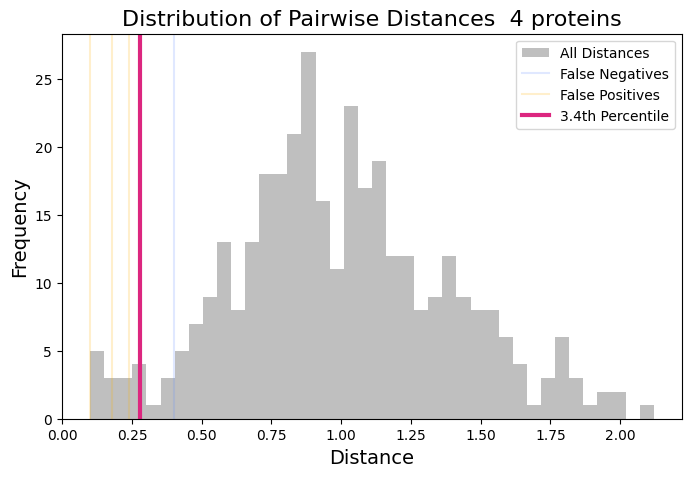

In [ ]:
metric = "manhattan"
n = 4
# retrieve from previous steps output e.g. :
percentile = 3.4
result_filtered = core.perform_distance_evaluation_on_ranked_proteins(
    df=df_filtered,
    p=percentile,
    threshold_based=True,
    top_importance_df=ranking,
    metric=metric,
    n=n,
)